# Chest X-Ray Medical Report Generation Using Deep Learning

<h1>1. Business Problem </h1>

<h2> 1.1 Description </h2>

If you go to the doctor with chest pain, a chest injury or shortness of breath, you will typically get a chest X-ray.The chest x-ray is the most frequently requested radiologic examination. The image helps your doctor determine whether you have heart problems, a collapsed lung, pneumonia, broken ribs, emphysema, cancer or any of several other conditions.
  Chest x-ray is also helpful in diagnosing COVID-19 infection in lungs , because COVID-19 is primerily attacks our lungs.
  Once you get your x-ray done your doctor will interpret it using his knowledge and instruct you further.
  So our aim is to make these x-rays easy to read by generating reports depicting what a radiologist sees and observes in x-ray.
   

<p style='font-size:18px'><b> Problem Statemtent </b></p>


   Build a deep learning model to generate medical report from goven x-ray images. 


<p style='font-size:18px'><b> Source:</b>  

PNG Images : http://academictorrents.com/details/5a3a439df24931f410fac269b87b050203d9467d

XML Reports : http://academictorrents.com/details/66450ba52ba3f83fbf82ef9c91f2bde0e845ab

</p>


<h2> 1.2 Real World / Business Objectives and Constraints </h2>


1. The cost of a mis-classification can be very high.

2. No strict latency concerns.

3. Interpretability is partially important.

<h1>2. Machine Learning problem </h1>

<h2> 2.1 Data </h2>

<h3> 2.1.1 Data Overview </h3>


- Data will be in 2 TAR files:
1. One folder will contain PNG images which will be x-rays.
2. Ohter one has XML reports(More than one image could be associated with a report)



Size of Posts.xml - 14.6GB
Number of files in XML report folder = 3955

Number of files in XML report folder = 3955


the dataframe that we are using has 5 columns:  'IMAGES','COMPARISON','INDICATION','FINDINGS','IMPRESSION'


Data Field Explaination

Dataset contains 3955 rows. The columns in the table are:
IMAGES - contains paths of all the images related to a report(input variable)
COMPARISON - contains comments about different images of a report 
INDICATION - contains discription of why the x-ray was suggested.
FINDINGS -  initial findings from the x-ray images.
IMPRESSION - detailed information about the x-ray(target vaiable)

<b> Number of rows in dataframe = 3955  </b>


<h3>2.1.2 Example Data point </h3>



<?xml version="1.0" encoding="utf-8"?>
<eCitation>
   <meta type="rr"/>
   <uId id="CXR1772"/>
   <pmcId id="1772"/>
   <docSource>CXR</docSource>
   <IUXRId id="1772"/>
   <licenseType>open-access</licenseType>
   <licenseURL>http://creativecommons.org/licenses/by-nc-nd/4.0/</licenseURL>
   <ccLicense>byncnd</ccLicense>
   <articleURL/>
   <articleDate>2013-08-01</articleDate>
   <articleType>XR</articleType>
   <publisher>Indiana University</publisher>
   <title>Indiana University Chest X-ray Collection</title>
   <note>The data are drawn from multiple hospital systems.</note>
   <specialty>pulmonary diseases</specialty>
   <subset>CXR</subset>
   <MedlineCitation Owner="Indiana University" Status="supplied by publisher">
   
      <Article PubModel="Electronic">
      
         <Journal>
         
            <JournalIssue>
            
               <PubDate>
               
                  <Year>2013</Year>
               
                  <Month>08</Month>
               
                  <Day>01</Day>
            
               </PubDate>
         
            </JournalIssue>
      
         </Journal>
      
         <ArticleTitle>Indiana University Chest X-ray Collection</ArticleTitle>
      
         <Abstract>
         
            <AbstractText Label="COMPARISON">Radiograph Chest PA and Lateral XXXX, XXXX.</AbstractText>
         
            <AbstractText Label="INDICATION">Chest pain and shortness of breath</AbstractText>
         
            <AbstractText Label="FINDINGS">Mild cardiomegaly. The lungs are clear bilaterally. No large pleural effusion or pneumothorax. The XXXX are intact.</AbstractText>
         
            <AbstractText Label="IMPRESSION">No acute cardiopulmonary abnormalities.</AbstractText>
      
         </Abstract>
      
         <Affiliation>Indiana University</Affiliation>
      
         <AuthorList CompleteYN="Y">
         
            <Author ValidYN="Y">
            
               <LastName>Kohli</LastName>
            
               <ForeName>Marc</ForeName>
            
               <Initials>MD</Initials>
         
            </Author>
         
            <Author ValidYN="Y">
            
               <LastName>Rosenman</LastName>
            
               <ForeName>Marc</ForeName>
            
               <Initials>M</Initials>
         
            </Author>
      
         </AuthorList>
      
         <Language>eng</Language>
      
         <PublicationTypeList>
         
            <PublicationType>Radiology Report</PublicationType>
      
         </PublicationTypeList>
      
         <ArticleDate>
         
            <Year>2013</Year>
         
            <Month>08</Month>
         
            <Day>01</Day>
      
         </ArticleDate>
   
      </Article>
   
      <EssieArticleTitle>Indiana University Chest X-ray Collection</EssieArticleTitle>
   
      <IMedAuthor>Marc David Kohli MD</IMedAuthor>
   
      <IMedAuthor>Marc Rosenman M</IMedAuthor>

   </MedlineCitation>
   <MeSH>
   
      <major>Cardiomegaly/mild</major>

   </MeSH>
</eCitation>


<h2>2.2 Mapping the real-world problem to a Machine Learning Problem </h2>

<h3> 2.2.1 Type of Machine Learning Problem </h3>


1. This case study is basically based on generating a text given an inputimage. Specifically we want to generate a medical report given a chestx ray image.
2. This falls under a Vision Language task , which is a mixture of computer vision domain and natural language processing domain.



<h3>2.2.2 Performance metric </h3>

The metric that we will be using in this for evaluation will be BLEU score.

Bleu is a most common metric used for machine translation. It uses
something called modified precision to calculate the score, this score lies
between 0-1, 1 meaning it's exactly the same or perfect and 0 means there is
nothing in common.
The BLEU score was proposed by Kishore Papineni, et al. in their 2002 paper “BLEU: a Method for Automatic Evaluation of Machine Translation“.

link to paper: https://www.researchgate.net/publication/2588204_BLEU_a_Method_for_Automatic_Evaluation_of_Machine_Translation

we will use nltk library to calculate BLEU score.


<h1> 3. Exploratory Data Analysis </h1>



<h2> 3.1 Data Loading </h2>

<h3> 3.1.1 downloading data and extracting the zip file </h3>

In [1]:
#reference https://blog.gagahpangeran.com/torrent-to-google-drive-using-google-colab
!apt-get install transmission-cli

Reading package lists... Done
Building dependency tree       
Reading state information... Done
transmission-cli is already the newest version (2.92-3ubuntu2).
0 upgraded, 0 newly installed, 0 to remove and 21 not upgraded.


In [2]:
from google.colab import drive
drive.mount('/content/drive')#mounting google drive 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
'''''!transmission-cli -w '/content/drive/My Drive/case_study_2' https://academictorrents.com/download/66450ba52ba3f83fbf82ef9c91f2bde0e845aba9.torrent'''''

"''!transmission-cli -w '/content/drive/My Drive/case_study_2' https://academictorrents.com/download/66450ba52ba3f83fbf82ef9c91f2bde0e845aba9.torrent"

In [4]:
'''''!transmission-cli -w '/content/drive/My Drive/case_study_2' https://academictorrents.com/download/5a3a439df24931f410fac269b87b050203d9467d.torrent'''''

"''!transmission-cli -w '/content/drive/My Drive/case_study_2' https://academictorrents.com/download/5a3a439df24931f410fac269b87b050203d9467d.torrent"

In [5]:
#making directory where images need to be extracted
!pip install patool # patool is a zip file extraction tool
import patoolib
import os 
path_of_images = "images"
if path_of_images not in os.listdir():
  os.mkdir(path_of_images)
  patoolib.extract_archive("/content/drive/My Drive/case_study_2/NLMCXR_reports.tgz")#extracting archive
  patoolib.extract_archive('/content/drive/My Drive/case_study_2/NLMCXR_png.tgz',outdir=path_of_images)

<h3> 3.1.2 parsing the xml file </h3>

In [6]:
#https://stackoverflow.com/questions/1912434/how-do-i-parse-xml-in-python
import xml.etree.ElementTree as ET
root = ET.parse('/content/drive/My Drive/case_study_2/reports/ecgen-radiology/1.xml').getroot()#xml parsing

XML is an inherently hierarchical data format, and the most natural way to represent it is with a tree. ET has two classes for this purpose - ElementTree represents the whole XML document as a tree, and Element represents a single node in this tree. Interactions with the whole document (reading and writing to/from files) are usually done on the ElementTree level. Interactions with a single XML element and its sub-elements are done on the Element level.

<h3> 3.1.3 extracting the intrested columns from xml file </h3>

In [8]:
import os
ids = []
COMPARISON = []
INDICATION = []
FINDINGS = []
IMPRESSION = []
images = []

for filename in  sorted(os.listdir(os.path.join(os.getcwd(),'ecgen-radiology'))):#iterating over all the xml files in the directory
    root = ET.parse(os.path.join(os.getcwd(),'ecgen-radiology',filename)).getroot()#creating parser
    imageId = []

    for child in root.iter():#iterating over root node


        if child.tag == 'pmcId':#searching if tag has pmcId in it
            ids.append(child.attrib['id'])# append that tag value in ids list
        if child.tag == 'AbstractText':
            if child.attrib['Label'] == 'COMPARISON':

                COMPARISON.append(child.text)
            if child.attrib['Label'] == 'INDICATION':

                INDICATION.append(child.text)
            if child.attrib['Label'] == 'FINDINGS':

                FINDINGS.append(child.text)
            if child.attrib['Label'] == 'IMPRESSION':

                IMPRESSION.append(child.text)
        if child.tag == 'parentImage':   
            imageId.append(os.getcwd()+'/'+path_of_images+'/'+child.attrib['id']+'.png')#storing images in current working directory under path_of_images tag and filenames will be same as id atribute
    images.append(imageId)# appending image_paths to images list

In [9]:
print(len(images))
print(len(COMPARISON))
print(len(INDICATION))
print(len(FINDINGS))
print(len(IMPRESSION))

3955
3955
3955
3955
3955


<h3> 3.1.4 saving extracted columns into dataframe  </h3>

In [10]:
data = (zip(images,COMPARISON,INDICATION,FINDINGS,IMPRESSION))

In [11]:
import pandas as pd
df = pd.DataFrame(data=data,index = [int(i) for i in ids],columns = ['IMAGES','COMPARISON','INDICATION','FINDINGS','IMPRESSION'])#making dataframe out of data

In [12]:
df.head()

,IMAGES,COMPARISON,INDICATION,FINDINGS,IMPRESSION
1,"[/content/images/CXR1_1_IM-0001-3001.png, /con...",None.,Positive TB test,The cardiac silhouette and mediastinum size ar...,Normal chest x-XXXX.
10,"[/content/images/CXR10_IM-0002-1001.png, /cont...",Chest radiographs XXXX.,"XXXX-year-old male, chest pain.",The cardiomediastinal silhouette is within nor...,No acute cardiopulmonary process.
100,"[/content/images/CXR100_IM-0002-1001.png, /con...",None.,None,Both lungs are clear and expanded. Heart and m...,No active disease.
1000,"[/content/images/CXR1000_IM-0003-1001.png, /co...",XXXX PA and lateral chest radiographs,"XXXX-year-old male, XXXX.",There is XXXX increased opacity within the rig...,1. Increased opacity in the right upper lobe w...
1001,"[/content/images/CXR1001_IM-0004-1001.png, /co...",None,"dyspnea, subjective fevers, arthritis, immigra...",Interstitial markings are diffusely prominent ...,Diffuse fibrosis. No visible focal acute disease.


In [13]:
df.sort_index(inplace=True)#sorting index

In [14]:
df.info()#displaying info about the dataframe

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3955 entries, 1 to 3999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   IMAGES      3955 non-null   object
 1   COMPARISON  3333 non-null   object
 2   INDICATION  3865 non-null   object
 3   FINDINGS    3425 non-null   object
 4   IMPRESSION  3921 non-null   object
dtypes: object(5)
memory usage: 185.4+ KB


<h2> 3.2 EDA on each columns </h2>

### 3.2.1 COLUMN IMAGES:

In [15]:
import numpy as np
img_count = df.IMAGES.apply(lambda x:len(x))#counting number of images per datapoint

In [16]:
print('mean of number  of images per report are :',img_count.mean())
print('median of number  of images per report are :',img_count.median())
print('maximum number  of images per report are :',img_count.max())
print('minimum number  of images per report are :',img_count.min())

mean of number  of images per report are : 1.8887484197218711
median of number  of images per report are : 2.0
maximum number  of images per report are : 5
minimum number  of images per report are : 0


In [17]:
print('number of images associated with each report')
print(img_count.value_counts())

number of images associated with each report
2    3208
1     446
3     181
0     104
4      15
5       1
Name: IMAGES, dtype: int64


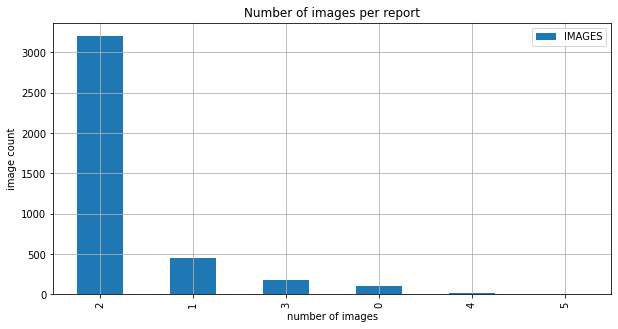

In [18]:
import matplotlib.pyplot as plt
df.IMAGES.apply(lambda x:len(x)).value_counts().plot(figsize = (10,5),kind = 'bar',legend =True,grid =True,title='Number of images per report')
plt.xlabel('number of images')
plt.ylabel('image count')
plt.show()

In [19]:
img_count_0 = df.IMAGES.apply(lambda x:len(x)==0)#counting which datapoint does not have image attached to it

In [20]:
idx = []
for i in img_count_0.index.values:
    if img_count_0[i]==True:
        idx.append(i)

In [21]:
#dropping rows whocse which does not have images attached to it.
df.drop(idx, inplace=True)

In [22]:
print(len(df))#length of dataframe after removing datapoints without images in it

3851


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3851 entries, 1 to 3999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   IMAGES      3851 non-null   object
 1   COMPARISON  3252 non-null   object
 2   INDICATION  3765 non-null   object
 3   FINDINGS    3337 non-null   object
 4   IMPRESSION  3820 non-null   object
dtypes: object(5)
memory usage: 180.5+ KB


In [24]:
df.reset_index()#resetting index
df.sort_index(inplace=True)#sorting indeces
df.head()

,IMAGES,COMPARISON,INDICATION,FINDINGS,IMPRESSION
1,"[/content/images/CXR1_1_IM-0001-3001.png, /con...",None.,Positive TB test,The cardiac silhouette and mediastinum size ar...,Normal chest x-XXXX.
2,"[/content/images/CXR2_IM-0652-1001.png, /conte...",None.,Preop bariatric surgery.,Borderline cardiomegaly. Midline sternotomy XX...,No acute pulmonary findings.
3,"[/content/images/CXR3_IM-1384-1001.png, /conte...",None,"rib pain after a XXXX, XXXX XXXX steps this XX...",None,"No displaced rib fractures, pneumothorax, or p..."
4,"[/content/images/CXR4_IM-2050-1001.png, /conte...",None available,XXXX-year-old XXXX with XXXX.,There are diffuse bilateral interstitial and a...,1. Bullous emphysema and interstitial fibrosis...
5,"[/content/images/CXR5_IM-2117-1003002.png, /co...",None,Chest and nasal congestion.,The cardiomediastinal silhouette and pulmonary...,No acute cardiopulmonary abnormality.


In [25]:
df.isna().sum()#counting nan's in each column

IMAGES          0
COMPARISON    599
INDICATION     86
FINDINGS      514
IMPRESSION     31
dtype: int64

### 3.2.2 COLUMN COMPARISON:

In [26]:
#displaying top 10 datapoints with highest number of occurences
df.COMPARISON.value_counts(dropna = False)[:10]

None.                                 814
NaN                                   599
None                                  567
XXXX                                  280
XXXX, XXXX.                           220
XXXX, XXXX                            159
None available.                       126
XXXX.                                 119
None available                         81
Two views of the chest dated XXXX.     23
Name: COMPARISON, dtype: int64

In [27]:
#summing up top 9 valuecounts to see how many are not useful
print('number of None values in COMPARISION column:',df.COMPARISON.value_counts()[:9].sum())

number of None values in COMPARISION column: 2389


### 3.2.3 COLUMN INDICATION:

In [28]:
#displaying top 15 datapoints with highest number of occurences
df.INDICATION.value_counts(dropna = False)[:15]

Chest pain                               129
XXXX                                     114
Chest pain.                               88
NaN                                       86
chest pain                                62
XXXX.                                     58
XXXX-year-old female with chest pain.     39
XXXX-year-old male with chest pain.       38
Dyspnea                                   37
Shortness of breath                       31
dyspnea                                   29
Shortness of breath.                      23
XXXX-year-old female with chest pain      19
XXXX-year-old woman with chest pain.      19
XXXX-year-old female with XXXX.           19
Name: INDICATION, dtype: int64

### 3.2.4 COLUMN FINDINGS:

In [29]:
#displaying 10 datapoints with highest number of occurences
df.FINDINGS.value_counts(dropna = False)[:10]

NaN                                                                                                                                                                                                                                                 514
The heart and lungs have XXXX XXXX in the interval. Both lungs are clear and expanded. Heart and mediastinum normal.                                                                                                                                 51
The heart is normal in size. The mediastinum is unremarkable. The lungs are clear.                                                                                                                                                                   51
Heart size normal. Lungs are clear. XXXX are normal. No pneumonia, effusions, edema, pneumothorax, adenopathy, nodules or masses.                                                                                                                    46
The lung

### 3.2.5 COLUMN IMPRESSION(TARGET):

In [30]:
#displaying 10 datapoints with highest number of occurences
df.IMPRESSION.value_counts(dropna = False)[:20]

No acute cardiopulmonary abnormality.                301
No active disease.                                   127
No acute cardiopulmonary abnormalities.              112
No acute cardiopulmonary findings.                   111
No acute disease.                                    109
No acute cardiopulmonary disease.                     99
No acute cardiopulmonary process.                     66
1. No acute radiographic cardiopulmonary process.     66
No evidence of active disease.                        47
No acute cardiopulmonary abnormality. .               47
1. No evidence of active disease.                     44
No acute pulmonary disease.                           44
No acute cardiopulmonary abnormality..                43
Normal chest                                          36
No acute cardiopulmonary findings. .                  35
NaN                                                   31
No acute findings                                     30
Negative for acute abnormality.

In [35]:
#displaying 10 datapoints with highest number of occurences
df.IMPRESSION.value_counts()[-10:]

No focal lung infiltrates.                                                                                                                                                                                                                        1
Stable left lower lung XXXX calcified granuloma. Otherwise lungs are clear. Left-sided perihilar calcified lymph node, unchanged. No XXXX of the pleural effusions. No XXXX of active cardiopulmonary disease. No XXXX of active tuberculosis.    1
1. Mildly elevated right hemidiaphragm. Otherwise no acute cardiopulmonary abnormality seen.                                                                                                                                                      1
Negative preoperative chest x-XXXX.                                                                                                                                                                                                               1
1. Vascular congestion a

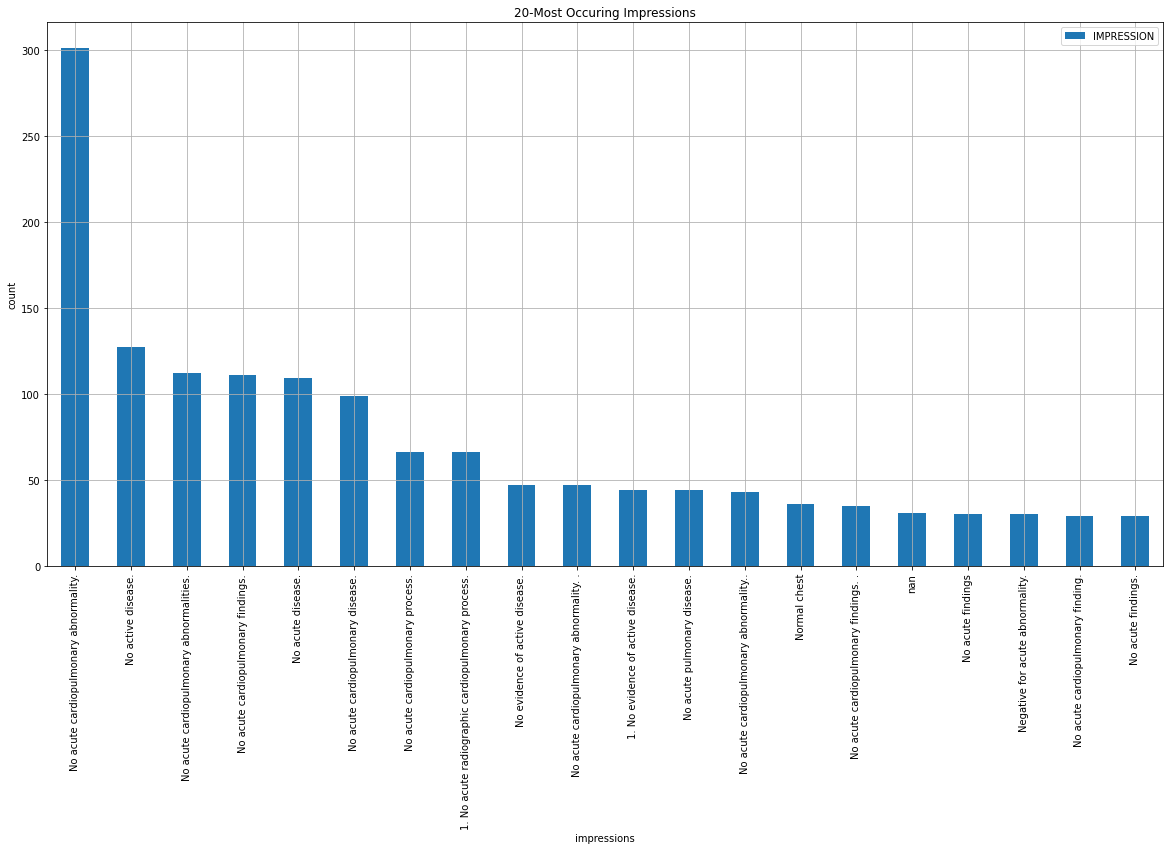

In [36]:
import matplotlib.pyplot as plt

df.IMPRESSION.value_counts(dropna = False)[:20].plot(figsize = (20,10),kind = 'bar',legend =True,grid =True,title='20-Most Occuring Impressions')
plt.xlabel('impressions')
plt.ylabel('count')
plt.show()


In [37]:
#filling NaN's with string 'no impressioni so that data does not get wasted'
df.fillna('no impression', inplace=True)

In [38]:
#getting word counts of each datapoint in impression column
word_length = df.IMPRESSION.str.split().apply(lambda x:len(x))

In [39]:
print('mean of words are in single impression are :',word_length.mean())
print('median of words are in single impression are:',word_length.median())
print('maximum number of words are in single impression are :',word_length.max())
print('minimum number of words are in single impression are :',word_length.min())

mean of words are in single impression are : 10.493378343287457
median of words are in single impression are: 5.0
maximum number of words are in single impression are : 130
minimum number of words are in single impression are : 1


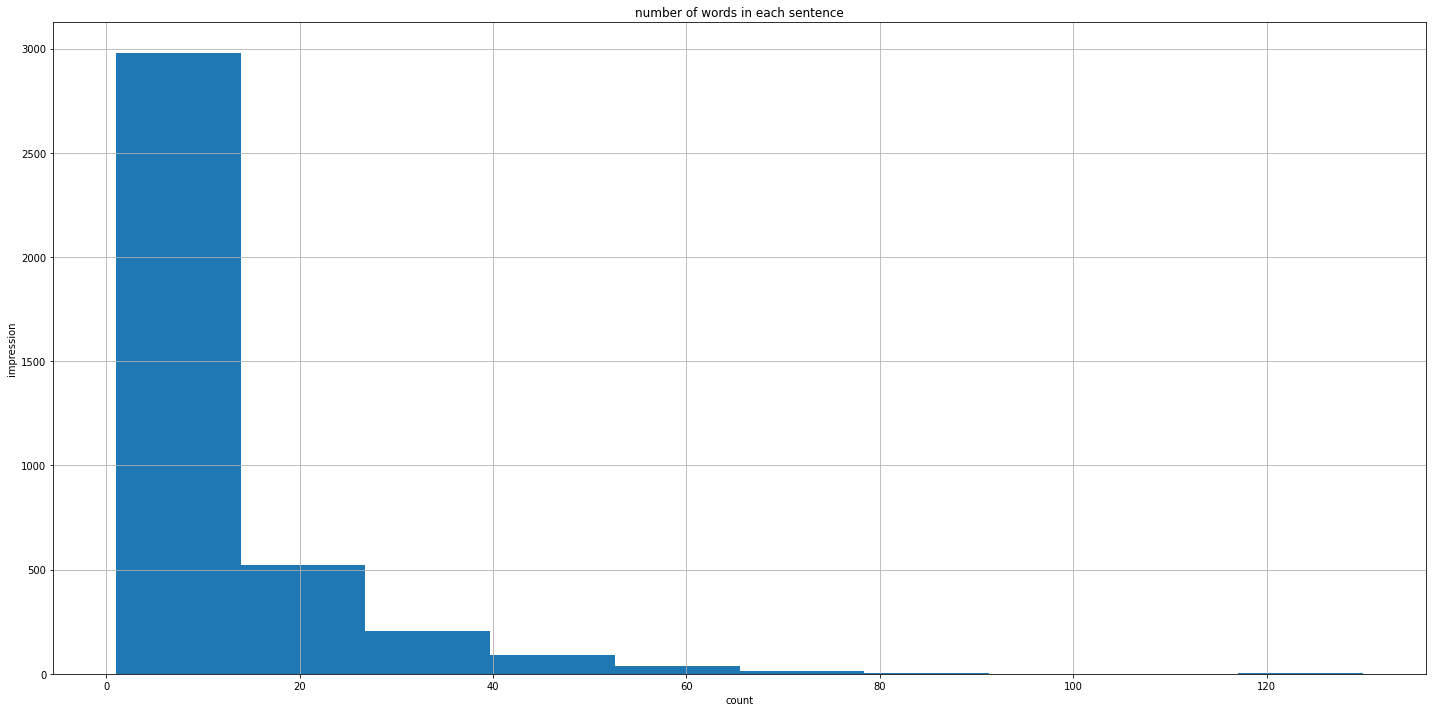

In [40]:
import matplotlib.pyplot as plt
plt.figure(figsize = (20,10))
plt.hist(word_length)
plt.xlabel("count")
plt.ylabel("impression")
plt.title('number of words in each sentence')
plt.tight_layout()
plt.grid()
plt.show()

## Findings from EDA:
1. I think i will only keep the impressions and image columns others have many null values.
2. In impression column there were nan values too 30 around i dropped them as of now but i think i can replace nans with no impression and pass it to the model.
3. Mostly the reports are normal only some are abnormal so data bias is there.
4. Mainly there are 2 images per report so i will pass 2 images only, if less than that then i will repeat the 1st image itself twice. there fewer occurences of 3 and 4 images per image i will keep first two and discard the rest.there is only one report with 5 images so will perform same actions as for 2-4 images.,

<h2> 3.3 Data Cleaning </h2>

In [41]:
df.head()

,IMAGES,COMPARISON,INDICATION,FINDINGS,IMPRESSION
1,"[/content/images/CXR1_1_IM-0001-3001.png, /con...",None.,Positive TB test,The cardiac silhouette and mediastinum size ar...,Normal chest x-XXXX.
2,"[/content/images/CXR2_IM-0652-1001.png, /conte...",None.,Preop bariatric surgery.,Borderline cardiomegaly. Midline sternotomy XX...,No acute pulmonary findings.
3,"[/content/images/CXR3_IM-1384-1001.png, /conte...",no impression,"rib pain after a XXXX, XXXX XXXX steps this XX...",no impression,"No displaced rib fractures, pneumothorax, or p..."
4,"[/content/images/CXR4_IM-2050-1001.png, /conte...",None available,XXXX-year-old XXXX with XXXX.,There are diffuse bilateral interstitial and a...,1. Bullous emphysema and interstitial fibrosis...
5,"[/content/images/CXR5_IM-2117-1003002.png, /co...",no impression,Chest and nasal congestion.,The cardiomediastinal silhouette and pulmonary...,No acute cardiopulmonary abnormality.


### 3.3.1 Dropping 'COMPARISON','INDICATION','FINDINGS' columns.

In [42]:
#dropping columns as it has many null values
df.drop(labels = ['COMPARISON'],inplace = True,axis = 1)
df.drop(labels = ['INDICATION'],inplace = True,axis = 1)
df.drop(labels = ['FINDINGS'],inplace = True,axis = 1)
df.head()

,IMAGES,IMPRESSION
1,"[/content/images/CXR1_1_IM-0001-3001.png, /con...",Normal chest x-XXXX.
2,"[/content/images/CXR2_IM-0652-1001.png, /conte...",No acute pulmonary findings.
3,"[/content/images/CXR3_IM-1384-1001.png, /conte...","No displaced rib fractures, pneumothorax, or p..."
4,"[/content/images/CXR4_IM-2050-1001.png, /conte...",1. Bullous emphysema and interstitial fibrosis...
5,"[/content/images/CXR5_IM-2117-1003002.png, /co...",No acute cardiopulmonary abnormality.


In [43]:
df['IMAGES'][1]#sample datapoint 

['/content/images/CXR1_1_IM-0001-3001.png',
 '/content/images/CXR1_1_IM-0001-4001.png']

### 3.3.2 storing trimmed data into pickle file. 

In [44]:
df.to_pickle('/content/drive/My Drive/case_study_2/extract')# storing dataframe to pickle file so as to use further

In [45]:
df = pd.read_pickle('/content/drive/My Drive/case_study_2/extract')# reading  pickle file

In [46]:
df.reset_index(inplace=True,drop = True)# resettnig indeces

In [47]:
#displaying columns
df.columns

Index(['IMAGES', 'IMPRESSION'], dtype='object')

In [48]:
df.head()

,IMAGES,IMPRESSION
0,"[/content/images/CXR1_1_IM-0001-3001.png, /con...",Normal chest x-XXXX.
1,"[/content/images/CXR2_IM-0652-1001.png, /conte...",No acute pulmonary findings.
2,"[/content/images/CXR3_IM-1384-1001.png, /conte...","No displaced rib fractures, pneumothorax, or p..."
3,"[/content/images/CXR4_IM-2050-1001.png, /conte...",1. Bullous emphysema and interstitial fibrosis...
4,"[/content/images/CXR5_IM-2117-1003002.png, /co...",No acute cardiopulmonary abnormality.


In [49]:
#filling nan's with no impression so that these columns do the image related to it doesent go to waste.
df.fillna('no impression', inplace=True)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3851 entries, 0 to 3850
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   IMAGES      3851 non-null   object
 1   IMPRESSION  3851 non-null   object
dtypes: object(2)
memory usage: 60.3+ KB


In [51]:
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from sklearn.manifold import TSNE
import nltk
import matplotlib.pyplot as plt
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

<h3> 3.3.3 most common words </h3>

In [52]:
stopwords1 = set(STOPWORDS)#setting stopwords

Word Cloud for IMPRESSION 


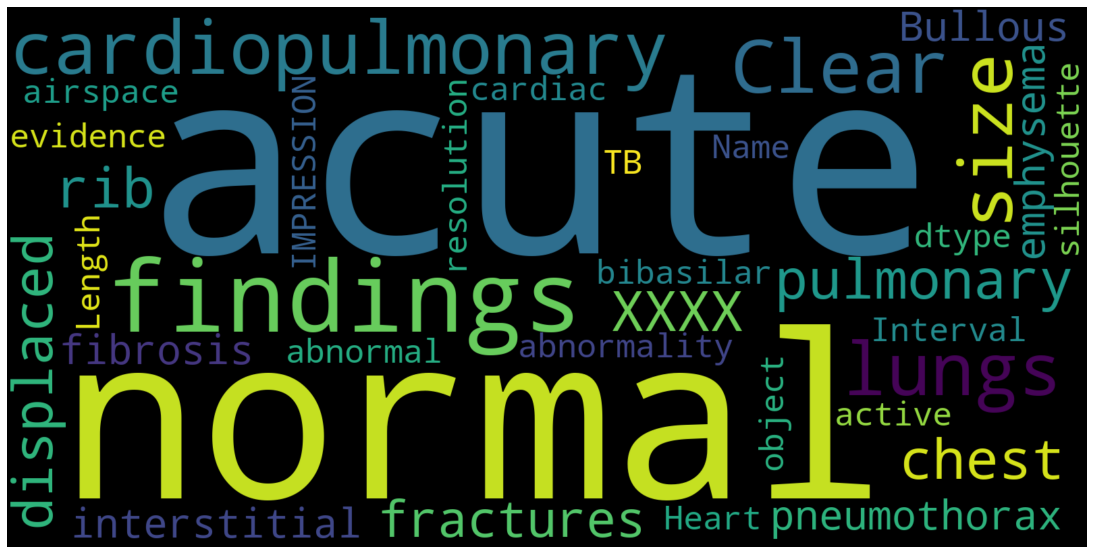

In [53]:
# generating word cloud of most occuring words ignoring stop words 
wc = WordCloud(background_color="black", max_words=len(df),width=1600,
                          height=800, stopwords=stopwords1)
wc.generate(str(df["IMPRESSION"]))
print("Word Cloud for IMPRESSION ")
fig = plt.figure(figsize=(15,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

<h2> 3.4 Data Preprocessing </h2>

In [54]:
# replacing short words with their full words eg: won't to will not etc
def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [55]:
text = df['IMPRESSION'][1057]
print(text)

No radiographic evidence of acute cardiopulmonary disease


In [56]:
import re

def preprocess(text):
  text = re.sub('XXXX','',text)#substituting XXXX string which occurs n most of the impressions with space as it has no semantic meaning
  text=re.sub(r'[^A-Za-z]+',' ',text)#replacing anything other than words wtih space
  text = decontracted(text)#decontracting the words
  text = re.sub('\\r', ' ',text)#replacing new line with space
  text = re.sub('\\n', ' ',text)#replacing tab with single space
  
  return text

In [57]:
print('before preprocessing \n',df['IMPRESSION'][1065])
clean = preprocess(df['IMPRESSION'][1065])
print('after preprocessing \n',clean)

before preprocessing 
 Congestive heart failure with basilar pulmonary interstitial edema and bilateral pleural fluid.
after preprocessing 
 Congestive heart failure with basilar pulmonary interstitial edema and bilateral pleural fluid 


### 3.4.1 Preprocessing  IMPRESSION column

In [58]:
df['IMPRESSION'] = df['IMPRESSION'].map(preprocess)# mapping whole column to the preprocess function , it will apply this function to whole column line by line

### 3.4.2 Preprocessing  IMAGES column

In [59]:
#keeping only first two images per datapoints
df['IMAGES'] = df['IMAGES'].apply(lambda x:x[:2])

In [60]:
df.head()

,IMAGES,IMPRESSION
0,"[/content/images/CXR1_1_IM-0001-3001.png, /con...",Normal chest x
1,"[/content/images/CXR2_IM-0652-1001.png, /conte...",No acute pulmonary findings
2,"[/content/images/CXR3_IM-1384-1001.png, /conte...",No displaced rib fractures pneumothorax or ple...
3,"[/content/images/CXR4_IM-2050-1001.png, /conte...",Bullous emphysema and interstitial fibrosis P...
4,"[/content/images/CXR5_IM-2117-1003002.png, /co...",No acute cardiopulmonary abnormality


In [61]:
# for rows having only one image we are copying that image twice
for i in range(len(df['IMAGES'])):
  if len(df['IMAGES'][i])<2:
    df['IMAGES'][i] = [df['IMAGES'][i][0],df['IMAGES'][i][0]]


In [62]:
#finding heights and widths of all the images
heights = []
widths = []
import cv2
for i in range(len(df['IMAGES'])):
  for j in range(len(df['IMAGES'][i])):
    img = cv2.imread(df['IMAGES'][i][j], cv2.IMREAD_UNCHANGED) #reading/loading image
    height, width, channels = img.shape #getting width and height of image
    heights.append(height)
    widths.append(width)

In [63]:
from statistics import mean,median
print('mean of heights: ',mean(heights))
print('median of heights: ',median(heights))

print('mean of widths: ',mean(widths))
print('median of widths: ',median(widths))


mean of heights:  531.6648922357829
median of heights:  512.0
mean of widths:  512
median of widths:  512.0


In [64]:
#checking if there are only two images per datapoint
from tqdm import tqdm
image_paths = []
for lst_of_img in tqdm(df["IMAGES"]):
  for img in lst_of_img:
    image_paths.append(img)

100%|██████████| 3851/3851 [00:00<00:00, 1324716.21it/s]


In [65]:
#so we have 7702 image_paths in total and we have3 3851 datapoints in our dataframe which is half of that
len(image_paths)

7702

In [66]:
word_len = []
for i in range(len(df)):
  word_len.append(len(df['IMPRESSION'][i].split()))

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


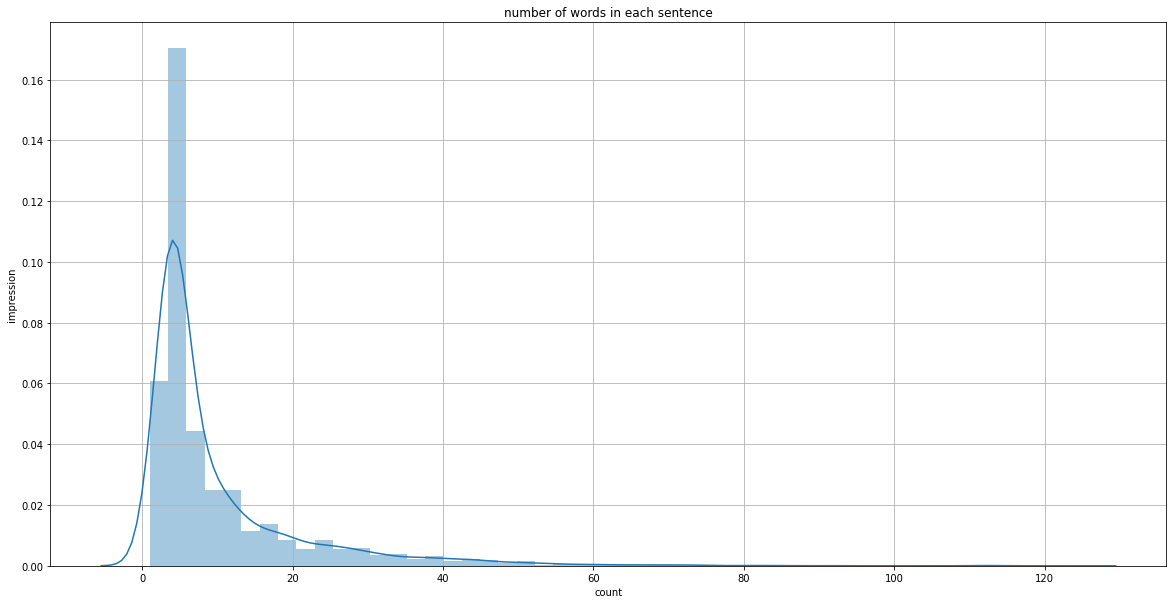

In [67]:
import matplotlib.pyplot as plt#matplot lib is also a plotting library
import seaborn as sns#seaborn is a plotting library
plt.figure(figsize = (20,10))
sns.distplot(word_len)
plt.grid()
plt.xlabel("count")
plt.ylabel("impression")
plt.title('number of words in each sentence')
plt.show()

In [68]:
#finding 99 percentile value of word_lengths of each ipression so as to see that how many words does 99 percent of them contain
import numpy as np
max_length= int(np.percentile(word_len,100))
print('99 percent of impressions has word length less that or equal to : ',max_length)

99 percent of impressions has word length less that or equal to :  123


### 3.4.3 Adding special string to IMPRESSION column.

In [69]:
# inserting starting <start> and <end> string in impression column
imp_inp = []
imp_out = []
for i in range(len(df['IMPRESSION'])):
  imp_inp.append('<start> '+df['IMPRESSION'][i])#we will passs <start> token follwed by sentence as input to model 
  imp_out.append(df['IMPRESSION'][i] + ' <end>')#we will expect whole sentence and <end> token as output
  df['IMPRESSION'][i]= '<start> ' +df['IMPRESSION'][i] + ' <end>' #sentence with whole <start> and <end> token

In [70]:
print('ORIGINAL SEQUENCE:  ',df['IMPRESSION'][1])
print('INPUT SEQUENCE:  ',imp_inp[1])
print('OUTPUT_SEQUENCE:  ',imp_out[1])

ORIGINAL SEQUENCE:   <start> No acute pulmonary findings  <end>
INPUT SEQUENCE:   <start> No acute pulmonary findings 
OUTPUT_SEQUENCE:   No acute pulmonary findings  <end>


### 3.4.4 Tokenizinzation.

In [ ]:
import tensorflow as tf
#tf.random.set_seed(42)
tokenizer = tf.keras.preprocessing.text.Tokenizer(split=' ',lower=True,filters='')#initializing tokenizer
tokenizer.fit_on_texts(df['IMPRESSION'])#fitting of whole corpus
target_vocab_size = len(tokenizer.word_index)+1#defining length of corpus which is 1486 words
target_inp = tokenizer.texts_to_sequences(imp_inp)#converting texts into sequence of integers for passing them to model
target_inp = tf.keras.preprocessing.sequence.pad_sequences(target_inp,maxlen=max_length,
                                                           padding='post')#padding input sequences to 99percentile of max sequence length which we will pass as input to model 

target_out = tokenizer.texts_to_sequences(imp_out)#converting texts into sequence of integers 

target_out = tf.keras.preprocessing.sequence.pad_sequences(target_out,maxlen=max_length,
                                                           padding='post')#padding output sequences to 99 percentile of max sequence length which we will expect as output  model 

In [72]:
#displaying words at 1,2,3 tokens
print(tokenizer.index_word[1])
print(tokenizer.index_word[2])
print(tokenizer.index_word[3])

<start>
<end>
no


In [73]:
print('sample input sequence',target_inp[0])
print('sample output sequence',target_out[0])

sample input sequence [ 1 12 18 88  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0]
sample output sequence [12 18 88  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0]


In [74]:
print('vocab_size: ',target_vocab_size)

vocab_size:  1486


<h1>4. Machine Learning Models </h1>

## 4.1 Split the data into train,validation and test.

In [75]:
#dividing dataset into train(90%), validation(9%), test(1%) .
from sklearn.model_selection import train_test_split

img_name_train, img_name_temp, target_train_inp, target_temp_inp,target_train_out,target_temp_out = train_test_split(df['IMAGES'].values,
                                                                                                                  target_inp,
                                                                                                                  target_out,
                                                                                                                  test_size=0.10,
                                                                                                                   random_state=0,
                                                                                                                    shuffle=True)


img_name_val, img_name_test, target_val_inp, target_test_inp,target_val_out,target_test_out = train_test_split(img_name_temp,
                                                                                                                  target_temp_inp,
                                                                                                                  target_temp_out,
                                                                                                                  test_size=0.019,
                                                                                                                   random_state=0,
                                                                                                                    shuffle=True)



In [76]:
print('input_train_image shape',img_name_train.shape)
print('target_train_input shape', target_train_inp.shape)
print('target_train_output shape',target_train_out.shape)

input_train_image shape (3465,)
target_train_input shape (3465, 123)
target_train_output shape (3465, 123)


In [77]:
print('input__val_image shape',img_name_val.shape)
print('target_val_input shape', target_val_inp.shape)
print('target_val_output shape',target_val_out.shape)

input__val_image shape (378,)
target_val_input shape (378, 123)
target_val_output shape (378, 123)


In [78]:
print('input test image shape',img_name_test.shape)
print('target_test_input shape', target_test_inp.shape)
print('target_test_output shape',target_test_out.shape)

input test image shape (8,)
target_test_input shape (8, 123)
target_test_output shape (8, 123)


## 4.2 Defining hyperparameters

In [131]:
img_height = 224#int(median(heights)) # input image height
img_width = 224#int(median(widths)) #input image width

BATCH_SIZE = 7 #batch size
embedding_dim = 256 #embedding diensions for embedding layer
units = 512#256 #lstm units
rate = 0.1#dropout rate
input_len_dec = target_val_inp.shape[1]#length of input sequence 
attention_features_shape = 49 #feature shape after squeezing CheX-Net output feature, which will act as hidden dimension for decoder

## 4.3 data augmentation 

In [132]:
#augmentating input images because we dont have much data to train on.
import imgaug.augmenters as iaa
aug2 = iaa.Fliplr(1)# flip images left to right or horizontally
aug3 = iaa.Flipud(1) # flip images up down or vertically
aug4 = iaa.Emboss(alpha=(1), strength=1)#Augmenter that embosses images and overlays the result with the original image.
aug5 = iaa.DirectedEdgeDetect(alpha=(0.8), direction=(1.0))#detects edges that have certain directions and marks them in a black and white image and then overlays the result with the original image.
aug6 = iaa.Sharpen(alpha=(1.0), lightness=(1.5)) #sharpens images

## 4.4 loading and preprocessing images

In [133]:
#https://stackoverflow.com/questions/38025838/normalizing-images-in-opencv
# loading and preprocessing images
def preprocess_img(image_path,training = True):
    img = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)# reading image
    image = cv2.resize(img,(int(img_width),int(img_height)),interpolation = cv2.INTER_NEAREST)# resizing image as desired
    if training == True: # if this function is used during training only them we will augment images
      a = np.random.uniform() # selecting random number between 0-1 and applying different augmentations according to its output
      if a<0.2:
              image = aug2.augment_image(image)
      elif a<0.4:
              image = aug3.augment_image(image)
      elif a<0.6:
              image = aug4.augment_image(image)
      elif a<0.8:
              image = aug5.augment_image(image)
      else:
              image = aug6.augment_image(image)

    image = cv2.normalize(image, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)# normalizing images to compress the pixel values between 0-1.
    return image ,image_path


In [134]:
def load_image1(image_path,training = True):
    img = tf.io.read_file(image_path)# reading image
    img = tf.image.decode_jpeg(img, channels=3)
    image = tf.image.resize(img, (int(img_height),int(img_width)))# resizing image as desired
    if training == True: #if this function is used during training only them we will augment images
      
      a = np.random.uniform() #selecting random number between 0-1 and applying different augmentations according to its output
      if a<0.2:
              image = aug2.augment_image(image)
      elif a<0.4:
              image = aug3.augment_image(image)
      elif a<0.6:
              image = aug4.augment_image(image)
      elif a<0.8:
              image = aug5.augment_image(image)
      else:
              image = aug6.augment_image(image)
              
    image = tf.keras.applications.densenet.preprocess_input(image)#normalize image
    return image,image_path

In [135]:
img_name_train[1]

['/content/images/CXR314_IM-1477-1001.png',
 '/content/images/CXR314_IM-1477-2001.png']

## 4.5 Dataloader function

In [136]:
#https://github.com/keras-team/keras/issues/8130 
#dataloader will first load images and then passs whole data in batches 
class Dataloder(tf.keras.utils.Sequence):    
    def __init__(self, image_names,capin,capout, batch_size=1, shuffle=False):

        self.image_names = image_names
        self.capin = capin
        self.capout = capout
        self.batch_size = batch_size
        self.shuffle = shuffle
        self.indexes = np.arange(len(image_names))
        
    def __getitem__(self, i):
        # collect batch data
        start = i * self.batch_size
        stop = (i + 1) * self.batch_size
        image1 =[]
        image2 = []
        caption_in = []
        caption_out = []
  
        for j in range(start, stop):
            img,img1 = self.__data_generation(self.image_names[j])#loading images from specific index
            image1.append(img)#apppending that image to array
            image2.append(img1)#appending second imm=age to another array
            caption_in.append(self.capin[j])#appending input impression to model 
            caption_out.append(self.capout[j])#appending expected output to array

        return tuple([(tf.convert_to_tensor(image1),tf.convert_to_tensor(image2),tf.convert_to_tensor(caption_in)),(tf.convert_to_tensor(caption_out))]) #returning tuple of (x,y)
    
    def __len__(self):
        return len(self.indexes) // self.batch_size #definig size of dataloader function

    def on_epoch_end(self):
        if self.shuffle:
            self.indexes = np.random.permutation(self.indexes)#shuffle indeces after every epoch

    def __data_generation(self,image_name):
        #preprocess and load images
        img,path = load_image1(image_name[0])

        img1,path1 = load_image1(image_name[1])
        
        return img,img1

In [137]:
train_dataloader = Dataloder(img_name_train, target_train_inp,target_train_out, batch_size=BATCH_SIZE, shuffle=True)
val_dataloader = Dataloder(img_name_val, target_val_inp,target_val_out, batch_size=BATCH_SIZE, shuffle=True)

In [138]:
#import tensorflow as tf
tf.compat.v1.enable_eager_execution()
from tensorflow.keras.layers import TimeDistributed
tf.keras.backend.clear_session()
from tensorflow.keras.layers import Input, Softmax, RNN, Dense, Embedding, LSTM,Dropout
from tensorflow.keras.models import Model
import numpy as np
#tf.keras.backend.set_floatx('float64')

## 4.6 Making model architecture. 

### 4.6.1 Loading pretrained Chex-Net model.

In [ ]:
#weights_link: https://github.com/brucechou1983/CheXNet-Keras
#loading pretrained Densenet121 on chest X-rays 
import tensorflow as tf
image_model = tf.keras.applications.DenseNet121(weights='/content/drive/My Drive/case_study_2/brucechou1983_CheXNet_Keras_0.3.0_weights.h5',
                                                classes = 14,input_shape=(int(img_height),int(img_width),3))

In [140]:
#removing last dense layer and making different model without top dense layer for encoder.
new_input = image_model.input
hidden_layer = image_model.layers[-3].output
image_features_extract_model = tf.keras.Model(new_input, hidden_layer)

In [141]:
image_features_extract_model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 112, 112, 64) 9408        zero_padding2d[0][0]             
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1/conv[0][0]                 
_______________________________________________________________________________________

### 4.6.2 CNN_Encoder

In [142]:
class CNN_Encoder(tf.keras.layers.Layer):
    # This encoder passes the features through a image_features_extract_model
    def __init__(self, embedding_dim,feature_extracter):
        super(CNN_Encoder, self).__init__()
        # shape after fc == (batch_size, 64, embedding_dim/2)
        #self.fc = tf.keras.layers.Dense(embedding_dim)
        self.image_features_extract_model = feature_extracter
    def call(self, x):
        x = image_features_extract_model(x)
        x = tf.reshape(x,(x.shape[0], -1, x.shape[3]))#squashing the output of image_features_extract_model.
        #x = self.fc(x)
        #x = tf.nn.relu(x)
        return x

### 4.6.3 Luong's Concat Attention: 

In [143]:
from tensorflow.keras import backend as K

#Luong's attention type1 :

class attention_concat(tf.keras.layers.Layer):
    def __init__(self):
        super().__init__()
        self.W1 = tf.keras.layers.Dense(units)
        self.W2 = tf.keras.layers.Dense(units)
        self.V = tf.keras.layers.Dense(1)
    
    def call(self,decoder_hidden_state,encoder_output_states):
        print('='*50,'attention','='*50)
        
        decoder_hidden_state = tf.expand_dims(decoder_hidden_state, 1)
        # features(encoder_output_states) shape == (batch_size, attention_features_shape, 2048)
        #decoder_hidden_state shape == (batch_size,1,units)
        print("attention shapes {},{} :".format(encoder_output_states.shape,decoder_hidden_state.shape))
        similarities = self.V(tf.nn.tanh(
        self.W1(decoder_hidden_state) + self.W2(encoder_output_states)))
        print("similarities shape:",similarities.shape)
        #similarities shape = (batch_size,attention_features_shape,1)
        attention_weights = tf.nn.softmax(similarities, axis=1)#shrinking similarities values between 0-1.
        print("attention_weights shape:",attention_weights.shape)

        #context_vector shape after sum == (batch_size, hidden_size)
        context_vector = attention_weights * encoder_output_states#multiplying these attention_weights with encoder output states to generate featue map of attention reigons.
        print("initial context shape",context_vector.shape)
        #initial context shape (batch_size, attention_features_shape, 2048)

        context_vector = tf.reduce_sum(context_vector, axis=1)#summing them up for passing them to next input.
        print("final context shape",context_vector.shape)
        #shape after summing over the first axis = (batch_size,2048)
        return context_vector, attention_weights

### 4.6.4 Luong's General Attention: 

In [144]:
from tensorflow.keras import backend as K
#luong's attention type 2:

class attention_general(tf.keras.layers.Layer):
    def __init__(self):
        super().__init__()
        self.W = tf.keras.layers.Dense(units)

    def call(self,decoder_hidden_state,encoder_output_states):
        # features(encoder_output_states) shape == (batch_size, attention_features_shape, 2048)
        #decoder_hidden_state shape == (batch_size,units)

        dense_out = self.W(encoder_output_states)
        #dense out shape  (batch_size, attention_features_shape, units)
        print("attention shapes {},{} :".format(decoder_hidden_state.shape,dense_out.shape))
        similarities = tf.keras.layers.Dot(axes=-1)([decoder_hidden_state,dense_out])
        print("similarities shape:",similarities.shape)
        #similarities shape = (batch_size,attention_features_shape)

        attention_weights = tf.nn.softmax(similarities, axis=-1)
        attention_weights = tf.expand_dims(attention_weights, -1)
        print("attention_weights shape:",attention_weights.shape)
        #attention_weighhts shape = (batch_size,attention_features_shape,1)

        # context_vector shape after sum == (batch_size, 2048)
        context_vector = attention_weights * encoder_output_states
        print("context shape",context_vector.shape)

        return context_vector, attention_weights

### 4.6.5 Decoder 

In [145]:
#decoder is the main part in this model it will take image features and generate prediction for each timestep.
class decoder(tf.keras.Model):
    def __init__(self,vocab_size,embedding_dim,input_length,dec_units,atten_layer):
        super().__init__()
        self.vocab_size = vocab_size #1486
        self.embedding_dim = embedding_dim #256
        self.input_length = input_length #max_length
        self.dec_units =dec_units #units
        self.dense= tf.keras.layers.Dense(self.vocab_size) #1486
        self.attention= atten_layer 

        self.embedding = Embedding(input_dim = self.vocab_size,output_dim =self.embedding_dim,
                             input_length = self.input_length,name = 'decoder_embedding_layer',mask_zero=True)

        self.lstm = LSTM(units = self.dec_units,return_state = True,return_sequences = True,name = 'train_decoder_LSTM',dropout=rate,recurrent_dropout=rate)

    @tf.function

    def one_step_decoder(self,input_to_decoder,decoder_hidden_state,encoder_output_states,decoder_cell_state):

        # this function is called at every timestep , it calculates attention,updates hidden and cell state of LSTM .

        embed = self.embedding(input_to_decoder)
        #embedding shape = (batch_size,vocab_size,embedding_dim)
        attn_context,attn_weights = self.attention(decoder_hidden_state,encoder_output_states)
        print("decoder_embedding shape:",tf.shape(embed))
        attn_context = tf.expand_dims(attn_context, 1)

        print("attention_context shape:",attn_context.shape)
        concat =tf.keras.layers.Concatenate(axis=-1)([embed,attn_context])
        print('shape after concat',concat.shape)
        #shape after concat == (batch_size,1,embedding_dim + 2048)
        concat = tf.nn.dropout(concat, rate)# using dropout to reduce overfitting

        decoder_outputs,decoder_hidden_state,decoder_cell_state = self.lstm(concat,initial_state=[decoder_hidden_state, decoder_cell_state])

        decoder_outputs = tf.reshape(decoder_outputs, (-1, decoder_outputs.shape[2]))
        output = self.dense(decoder_outputs)
        #output shaoe == (batch_size,1,vocab_size)
        return output,decoder_hidden_state,attn_weights,decoder_cell_state

    def reset_hidden_state(self, batch_size):
      #randomly initializing decoder hidden state
      return tf.random.normal((batch_size, self.dec_units))

    def reset_cell_state(self,batch_size):
      #randomly initializing decoder cell state
      return tf.random.normal((batch_size,self.dec_units))

    def call(self,input_to_decoder,decoder_hidden_state,encoder_output_states, decoder_cell_state):
        
        all_outputs = tf.TensorArray(tf.float32,size = input_to_decoder.shape[1],name = "output_arrays")#storing outputs at every timestep.
        for timestep in range(input_to_decoder.shape[1]):
            #this loop will update the cell and hidden states of the LSTM the 'decoder_hidden_state' and 'decoder_cell_state' on the right side of '=' are states of lstm at current time step and 
            #the outputs of these of are passed as inputs in next iteration.
            output,decoder_hidden_state,attn_weights,decoder_cell_state=self.one_step_decoder(input_to_decoder[:,timestep:timestep+1],decoder_hidden_state,encoder_output_states, decoder_cell_state)
            all_outputs = all_outputs.write(timestep,output)#writing output at every time step
        all_outputs = tf.transpose(all_outputs.stack(),[1,0,2])#reshapeing intto (batch_size,max_length,vocab_size)

        return all_outputs


## 4.7 Loss Function and Optimizer

In [146]:
import os,datetime

optimizer = tf.keras.optimizers.Adam(0.00001)

def loss_function(targets, logits):
    crossentropy = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)#loss function

    mask = tf.math.logical_not(tf.math.equal(targets, 0))#detecting mask tokens so that we can ignore them while calculating loss.
    mask = tf.cast(mask, dtype=tf.int64)#above output will give us True ,False array so we will convert it into 1's and 0's using this command
    loss = crossentropy(targets, logits, sample_weight=mask)#while calculating loss we will pass this mask as weights because
                                                            #the mask will contain 1's for only those values which are not padded.
    return loss


In [205]:
#length of train and validation dataloader
print('length of train dataloader : ',len(train_dataloader))
print('length of validation dataloader : ',len(val_dataloader))

length of train dataloader :  495
length of validation dataloader :  54


In [206]:
steps_per_epoch = int(len(train_dataloader)/BATCH_SIZE)
print('steps per epoch for train dataloader : ',steps_per_epoch)
steps_per_epoch_val = int(len(val_dataloader)/BATCH_SIZE)
print('steps per epoch for validation dataloader : ',steps_per_epoch_val)

steps per epoch for train dataloader :  70
steps per epoch for validation dataloader :  7


In [149]:
#initializing encoder and decoder.
CNN_Encoder = CNN_Encoder(embedding_dim,image_features_extract_model)
decoder = decoder(target_vocab_size, embedding_dim, input_len_dec,units,attention_concat())

In [150]:
#!rm -rf -r /content/Checkpoint

## 4.8 Model Checkpoint

In [151]:
#creating model checkpoint because we are using custom training.
checkpoint_path = "/content/drive/My Drive/case_study_2/checkpoint"
ckpt = tf.train.Checkpoint(encoder=CNN_Encoder,
                           decoder=decoder,
                           optimizer = optimizer)
ckpt_manager = tf.train.CheckpointManager(ckpt, checkpoint_path, max_to_keep=5)


In [152]:
# determining start epoch based on latest checkpoint saved.
start_epoch = 0
if ckpt_manager.latest_checkpoint:
  start_epoch = int(ckpt_manager.latest_checkpoint.split('-')[-1])
  print(start_epoch)
  # restoring the latest checkpoint in checkpoint_path
  ckpt.restore(ckpt_manager.latest_checkpoint)

In [153]:
#storing loss values for plotting later
tr_loss_plot = []
val_loss_plot = []

## 4.9 Custom Training

In [154]:
@tf.function
def train_step(inputs, target):
        loss2 = 0
        img1,img2,input_text = inputs[0],inputs[1],inputs[2] #seperating inputs

        # initializing the hidden state and cell_state for each batch
        # because the captions are not related from image to image
        hidden = decoder.reset_hidden_state(batch_size=BATCH_SIZE)
        cell_state = decoder.reset_cell_state(batch_size=BATCH_SIZE)
        
        print("="*20, "ENCODER", "="*20)
        with tf.GradientTape() as tape:#calculating gradient

          encoder_output_1 = CNN_Encoder(img1)#passing 1st image in encoder
          encoder_output_2 = CNN_Encoder(img2)#passing second image in encoder
          encoder_output = tf.keras.layers.Concatenate(axis=-1)([encoder_output_1,encoder_output_2])#concatenating outputs of both encoders
          encoder_output = Dropout(rate)(encoder_output)#dropout
          print("ENCODER ==> OUTPUT SHAPE",encoder_output.shape)
          #encoder output shape == (batch_size, attention_features_shape,2048)
          print("="*20, "DECODER", "="*20)
          decoder_output = decoder(input_text,hidden,encoder_output,cell_state)

          for i in range(decoder_output.shape[1]):
            #calculating batch loss at every tim step and summing it up.
            loss2 += loss_function(target[:, i], decoder_output[:,i])
            
          print("FINAL OUTPUT SHAPE",decoder_output.shape)
  
        total_loss = loss2/int(decoder_output.shape[1])#dividing the loss with total time steps to get total loss.
        trainable_variables = CNN_Encoder.trainable_variables + decoder.trainable_variables #getting trainable variable of both the encoder and decoder.
        gradients = tape.gradient(loss2,trainable_variables)#Computes the gradient using operations recorded in context of this tape.
        optimizer.apply_gradients(zip(gradients,trainable_variables))# Apply gradients to variables.
        return total_loss


In [155]:
#validatoion step performs the same steps as train_Step but without dropout and without calculating gradients, it is used just to predict loss on unseen data.
@tf.function
def validation_step(inputs, target):
        loss2 = 0
        img1,img2,input_text = inputs[0],inputs[1],inputs[2]

        hidden = decoder.reset_hidden_state(batch_size=BATCH_SIZE)
        cell_state = decoder.reset_cell_state(batch_size=BATCH_SIZE)
        
        encoder_output_1 = CNN_Encoder(img1)
        encoder_output_2 = CNN_Encoder(img2)
        encoder_output = tf.keras.layers.Concatenate(axis=-1)([encoder_output_1,encoder_output_2])
          
        decoder_output = decoder(input_text,hidden,encoder_output,cell_state)
        for i in range(decoder_output.shape[1]):
            loss2 += loss_function(target[:, i], decoder_output[:,i])
        total_loss = loss2/int(target.shape[1])
        return  total_loss


In [156]:
#custom training
import os,time
EPOCHS = 40

for epoch in range(start_epoch,EPOCHS):
  start = time.time()
  total_loss = 0
  total_loss_val = 0
  for (batch,(inputs,target)) in (enumerate(train_dataloader)):
      t_loss = train_step(inputs,target)#calculating loss per batch
      total_loss+=t_loss#adding batch loss to total loss variable
      if batch % int(steps_per_epoch/3) ==0:
        print('Epoch {} batch {} loss {:.4f}'.format(epoch+1,batch,t_loss.numpy()))
      if batch >= steps_per_epoch:  # manually detect the end of the epoch
           break  

  for (batch,(inputs,target)) in (enumerate(val_dataloader)):
    t_loss = validation_step(inputs,target)# calculating validation loss
    total_loss_val+=t_loss
     
    if batch >= steps_per_epoch_val:  # manually detect the end of the epoch
           break  
  #appending total loss value in the list for plotting
  tr_loss_plot.append((total_loss/steps_per_epoch).numpy())
  val_loss_plot.append((total_loss_val/steps_per_epoch_val).numpy())
  if epoch % 1 == 0:
    ckpt_manager.save()#saving model after every epoch
    
  train_dataloader.on_epoch_end()#shuffling train indeces
  val_dataloader.on_epoch_end()#shuffling validation indeces

  print ('Epoch {} Loss {:.6f} val_Loss {:.6f}'.format(epoch + 1,
                                         total_loss/steps_per_epoch,total_loss_val/steps_per_epoch_val))
  print ('Time taken for 1 epoch {} sec\n'.format(time.time() - start))
  
  if (len(val_loss_plot)>3) and val_loss_plot[-1] > np.asarray(val_loss_plot[-3]):
    #custom learning rate reducer, reduces lr if loss doesent change for last 3 epochs
    new_learning_rate = 0.1*optimizer.lr.numpy()
    print('decreasing learning rate from {:.7f} to {:.7f} :'.format(optimizer.lr.numpy(),new_learning_rate))
    optimizer.lr.assign(new_learning_rate)

  if (len(val_loss_plot)>6) and val_loss_plot[-1] > np.asarray(val_loss_plot[-6]):
    #stopping if there is no chamge in validation loss for 6 epochs.
    print('stopping due to no change in validation loss')
    break


==================== ENCODER ====================
ENCODER ==> OUTPUT SHAPE (7, 49, 2048)
==================== DECODER ====================
================================================== attention ==================================================
Tensor("attention_concat/ExpandDims:0", shape=(7, 1, 512), dtype=float32)
attention shapes (7, 49, 2048),(7, 1, 512) :
similarities shape: (7, 49, 1)
attention_weights shape: (7, 49, 1)
initial context shape (7, 49, 2048)
final context shape (7, 2048)
decoder_embedding shape: Tensor("Shape:0", shape=(3,), dtype=int32)
attention_context shape: (7, 1, 2048)
shape after concat (7, 1, 2304)
(7, 512) (7, 512)
================================================== attention ==================================================
Tensor("attention_concat/ExpandDims:0", shape=(7, 1, 512), dtype=float32)
attention shapes (7, 49, 2048),(7, 1, 512) :
similarities shape: (7, 49, 1)
attention_weights shape: (7, 49, 1)
initial context shape (7, 49, 2048)
final c

### 4.10 Plotting losses

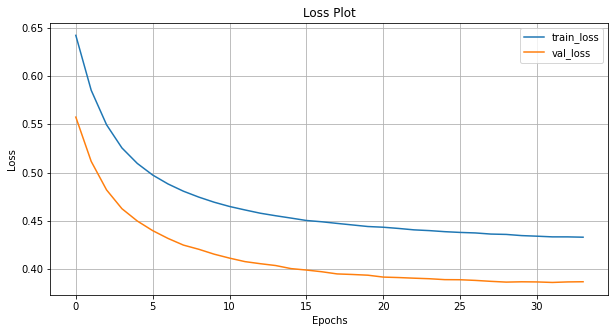

In [157]:
#plotting losses
plt.figure(figsize = (10,5))
plt.plot(tr_loss_plot,label='train_loss')
plt.plot(val_loss_plot,label = 'val_loss')
plt.legend()
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Plot')
plt.show()

### 4.11 model Evaluation

In [184]:
#The evaluate function is similar to the training loop, except you don't use teacher forcing here. 
#The input to the decoder at each time step is its previous predictions along with the hidden state and the encoder output.
def evaluate(image_path,capin):
    attention_plot = np.zeros((input_len_dec, attention_features_shape))
    encoder_output_1 = CNN_Encoder(image_path[0])
    encoder_output_2 = CNN_Encoder(image_path[1])
    encoder_output = tf.keras.layers.Concatenate(axis=-1)([encoder_output_1,encoder_output_2])
    hidden = decoder.reset_hidden_state(batch_size=1)
    cell_state = decoder.reset_cell_state(batch_size=1)
    dec_input = tf.expand_dims([tokenizer.word_index['<start>']], 0)
    result = []
    for i in range(input_len_dec):

        predictions,hidden,attention_weights,cell_state=decoder.one_step_decoder(dec_input,hidden,encoder_output, cell_state)#calling one step decoder function inside decoder.
        attention_plot[i] = tf.reshape(attention_weights, (-1, )).numpy()

        predicted_id = tf.random.categorical(predictions, 1)[0][0].numpy()# Draws samples from a categorical distribution.
        result.append(tokenizer.index_word[predicted_id])

        if tokenizer.index_word[predicted_id] == '<end>':#if prediction is <end> token then breaking the loop
            attention_plot = attention_plot[:len(result), :]

            return result, attention_plot

        dec_input = tf.expand_dims([predicted_id], 0)#reshaping input to decoder for feeding it again
    attention_plot = attention_plot[:len(result), :]#slicing

    return result, attention_plot

In [185]:
from google.colab.patches import cv2_imshow
from PIL import Image

def get_concat_h(im1, im2):
    #function for concatenating two images side by side.
    dst = Image.new('RGB', (im1.width + im2.width, im1.height))
    dst.paste(im1, (0, 0))
    dst.paste(im2, (im1.width, 0))
    return dst

def plot_attention(image, result, attention_plot):
    #plotting attention
    temp_image1 = Image.open(image[0])
    temp_image2 = Image.open(image[1])

    img = get_concat_h(temp_image1, temp_image2)#concatening images side by side.
    
    fig = plt.figure(figsize=(20, 20))

    len_result = len(result)
    for l in range(len_result):
        temp_att = np.resize(attention_plot[l], (7, 7))#resizing attention plot to 7,7 because our attention weight shape was 49.
        ax = fig.add_subplot(len_result//2+1, len_result//2+1, l+1)#adding subplots
        ax.set_title(result[l])#setting predicted word as the title of subplot.
        img1 = ax.imshow(img)#showing concatenated images.
        ax.imshow(temp_att, cmap='Greys', alpha=0.6, extent=img1.get_extent())#plotting attention weights over that image
    plt.tight_layout()
    plt.show()


In [186]:
#removing <start> and <end> tokens from sentence
def remove_tok(sentence):
  clean_sent = ''
  for i in sentence.split():
      if i == "<start>" or i == "<end>":
        continue
      else:
        clean_sent+= "".join(i+" ")
  return clean_sent.strip()

In [187]:
import warnings
warnings.filterwarnings('ignore')

import nltk.translate.bleu_score as bleu
def bleau_score(sentence,result):

  reference = remove_tok(sentence) # the original
  translation = remove_tok(result) # trasilated using model
  print('BLEU score: {}'.format(bleu.sentence_bleu([reference.split()], translation.split())))
  # cumulative BLEU scores

  # NOTE: 
  #sentence_bleu takes list of list of tokens for reference sentence and list of token as translation sentence

  print('Cumulative 1-gram: %f' % bleu.sentence_bleu([reference.split()], translation.split(), weights=(1, 0, 0, 0)))
  print('Cumulative 2-gram: %f' % bleu.sentence_bleu([reference.split()], translation.split(), weights=(0.5, 0.5, 0, 0)))
  print('Cumulative 3-gram: %f' % bleu.sentence_bleu([reference.split()], translation.split(), weights=(0.33, 0.33, 0.33, 0)))
  print('Cumulative 4-gram: %f' % bleu.sentence_bleu([reference.split()], translation.split(), weights=(0.25, 0.25, 0.25, 0.25)))

In [188]:
import warnings
warnings.filterwarnings('ignore')

import nltk.translate.bleu_score as bleu
def bleau_score_wrong(sentence,result):
  #NOTE:
  #this is the wrong implementation of bleu score that i was using earlier.

  reference = remove_tok(sentence) # the original
  translation = remove_tok(result) # trasilated using model
  print('BLEU score: {}'.format(bleu.sentence_bleu(reference, translation)))
  # cumulative BLEU scores

  print('Cumulative 1-gram: %f' % bleu.sentence_bleu(reference, translation ,weights=(1, 0, 0, 0)))
  print('Cumulative 2-gram: %f' % bleu.sentence_bleu(reference, translation ,weights=(0.5, 0.5, 0, 0)))
  print('Cumulative 3-gram: %f' % bleu.sentence_bleu(reference, translation ,weights=(0.33, 0.33, 0.33, 0)))
  print('Cumulative 4-gram: %f' % bleu.sentence_bleu(reference, translation ,weights=(0.25, 0.25, 0.25, 0.25)))

In [189]:
bleau_score('i am sezaz','i am ramana')

BLEU score: 0.7598356856515925
Cumulative 1-gram: 0.666667
Cumulative 2-gram: 0.577350
Cumulative 3-gram: 0.695905
Cumulative 4-gram: 0.759836


In [192]:
#this function loads the images and preprocesses them and then add batch dimension at 0 axis for evalueate unction.
def load_img(image_path):
    img1,path1 = preprocess_img(image_path[0],training = False)
    img2,path2 = preprocess_img(image_path[1],training = False)
    img1 = tf.expand_dims(img1, axis=0)
    img2 = tf.expand_dims(img2, axis=0)
    
    return (img1,img2)

### 4.12 Model Predictions

Real Caption: no acute cardiopulmonary findings chronic changes of emphysema and left basilar scarring
Prediction Caption: no hypoinflation minimal acute recommended lungs a left are identified no cannot <end>
BLEU score: 0.7071067811865476
Cumulative 1-gram: 0.250000
Cumulative 2-gram: 0.500000
Cumulative 3-gram: 0.632878
Cumulative 4-gram: 0.707107


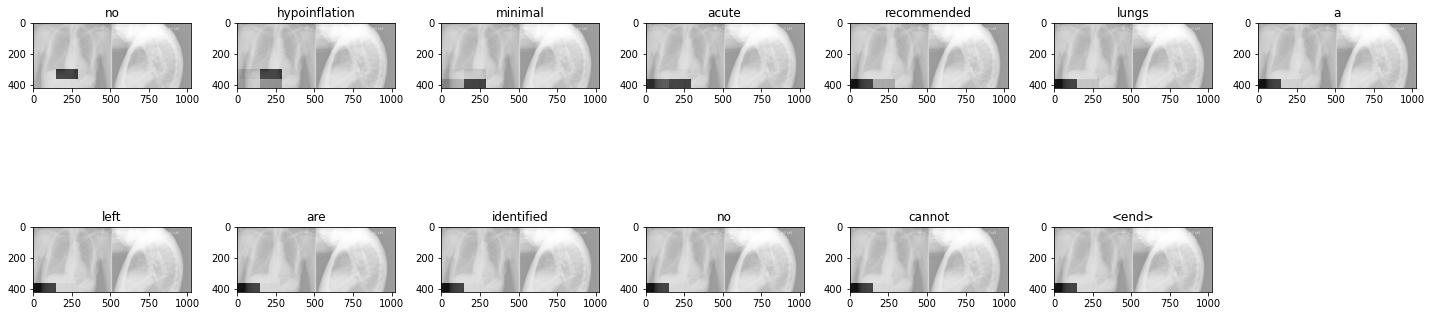

In [193]:
# captions on the validation set
rid = np.random.randint(0, len(img_name_test))#generating random datapoint from test dataset.
image = load_img( img_name_test[rid])#loading and preprocessing image

result, attention_plot = evaluate(image,target_test_inp[rid])#generating caption
rc = []

for i in target_test_out[rid]:
  if tokenizer.index_word[i] == '<end>':
    break
  else:
    rc.append(tokenizer.index_word[i])


print ('Real Caption:', ' '.join(rc))
print ('Prediction Caption:', ' '.join(result))
bleau_score(' '.join(rc), ' '.join(result))#calculating cumulative bleu score.
plot_attention(img_name_test[rid], result, attention_plot)#plotting attention


Real Caption: status post mediastinal surgery cardiomegaly atherosclerotic disease of the thoracic aorta lung volumes are reduced suspicion for at bilateral pleural effusions no acute airspace disease no pulmonary edema
Prediction Caption: evidence volumes pattern left cardiopulmonary these obliquely difficult right further recent silhouette visualized interstitial radiation may abnormalities <end>
BLEU score: 0.2578538932915104
Cumulative 1-gram: 0.030799
Cumulative 2-gram: 0.126988
Cumulative 3-gram: 0.205560
Cumulative 4-gram: 0.257854


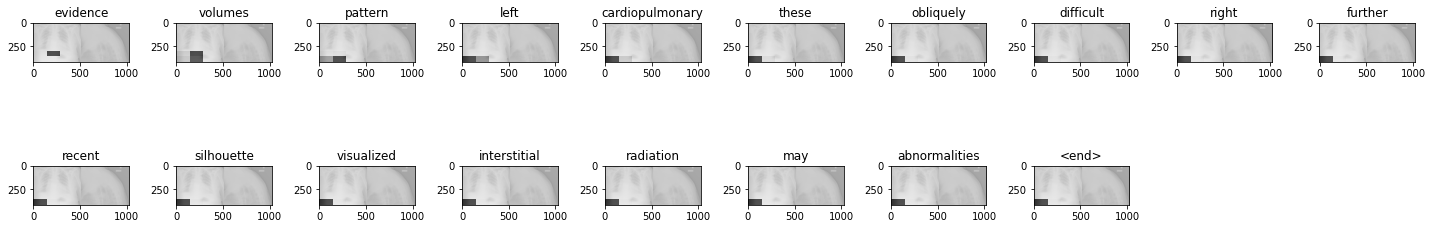

In [194]:
# captions on the validation set
rid = np.random.randint(0, len(img_name_test))#generating random datapoint from test dataset.
image = load_img( img_name_test[rid])#loading and preprocessing image

result, attention_plot = evaluate(image,target_test_inp[rid])#generating caption
rc = []

for i in target_test_out[rid]:
  if tokenizer.index_word[i] == '<end>':
    break
  else:
    rc.append(tokenizer.index_word[i])


print ('Real Caption:', ' '.join(rc))
print ('Prediction Caption:', ' '.join(result))
bleau_score(' '.join(rc), ' '.join(result))#calculating cumulative bleu score.
plot_attention(img_name_test[rid], result, attention_plot)#plotting attention


Real Caption: no acute findings
Prediction Caption: no evidence have right nodules of chest <end>
BLEU score: 0.6147881529512643
Cumulative 1-gram: 0.142857
Cumulative 2-gram: 0.377964
Cumulative 3-gram: 0.526160
Cumulative 4-gram: 0.614788


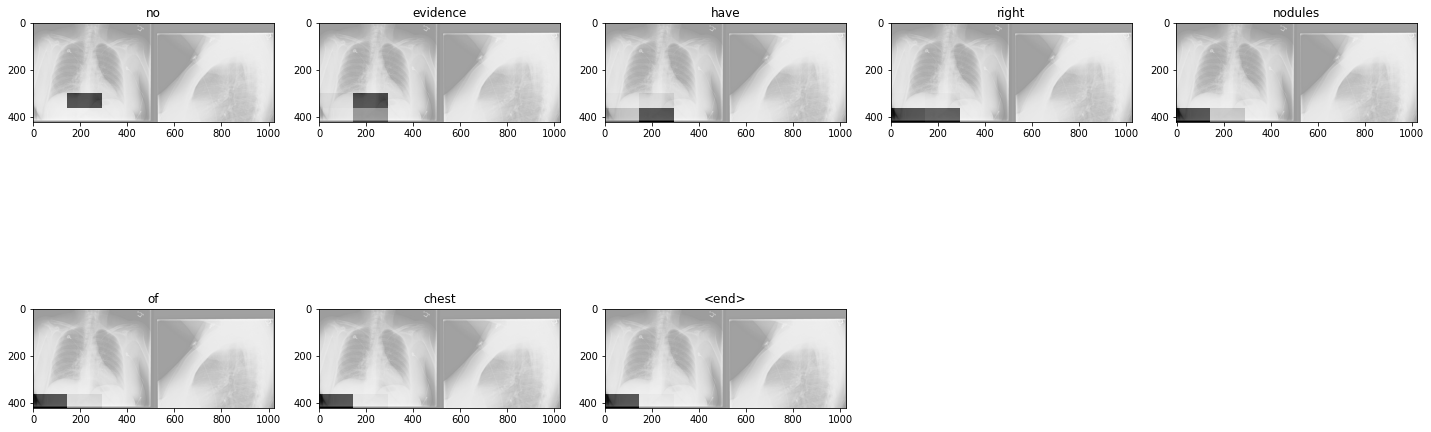

In [195]:
# captions on the validation set
rid = np.random.randint(0, len(img_name_test))#generating random datapoint from test dataset.
image = load_img( img_name_test[rid])#loading and preprocessing image

result, attention_plot = evaluate(image,target_test_inp[rid])#generating caption
rc = []

for i in target_test_out[rid]:
  if tokenizer.index_word[i] == '<end>':
    break
  else:
    rc.append(tokenizer.index_word[i])


print ('Real Caption:', ' '.join(rc))
print ('Prediction Caption:', ' '.join(result))
bleau_score(' '.join(rc), ' '.join(result))#calculating cumulative bleu score.
plot_attention(img_name_test[rid], result, attention_plot)#plotting attention


Real Caption: bilateral opacities most prominent in the lower lobes representing airspace disease or edema
Prediction Caption: retained volumes curvature normal lung prominent normal volumes fractures disease disease <end>
BLEU score: 0.5444358245099123
Cumulative 1-gram: 0.151591
Cumulative 2-gram: 0.355513
Cumulative 3-gram: 0.475026
Cumulative 4-gram: 0.544436


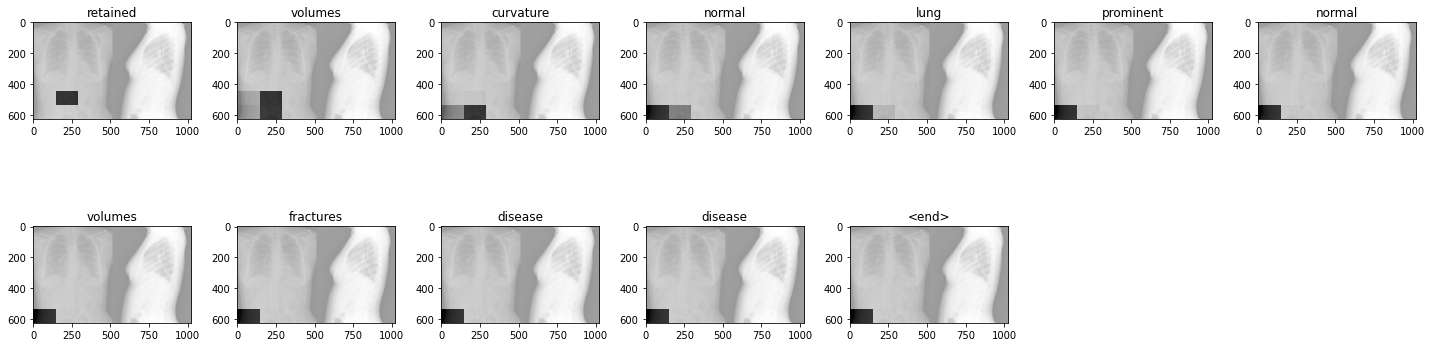

In [196]:
# captions on the validation set
rid = np.random.randint(0, len(img_name_test))#generating random datapoint from test dataset.
image = load_img( img_name_test[rid])#loading and preprocessing image

result, attention_plot = evaluate(image,target_test_inp[rid])#generating caption
rc = []

for i in target_test_out[rid]:
  if tokenizer.index_word[i] == '<end>':
    break
  else:
    rc.append(tokenizer.index_word[i])


print ('Real Caption:', ' '.join(rc))
print ('Prediction Caption:', ' '.join(result))
bleau_score(' '.join(rc), ' '.join(result))#calculating cumulative bleu score.
plot_attention(img_name_test[rid], result, attention_plot)#plotting attention


### 4.13 Whole corpus BLEU score

In [197]:
#http://www.nltk.org/api/nltk.translate.html#nltk.translate.bleu_score.sentence_bleu

import nltk.translate.bleu_score as bleu

def bleau_score1(sentence,result):

  reference = remove_tok(sentence) # the original
  translation = remove_tok(result) # trasilated using model

  bleau1 =  bleu.sentence_bleu([reference.split()], translation.split(), weights=(1, 0, 0, 0))
  bleau2 = bleu.sentence_bleu([reference.split()], translation.split(), weights=(0.5, 0.5, 0, 0))
  bleau3 = bleu.sentence_bleu([reference.split()], translation.split(), weights=(0.33, 0.33, 0.33, 0))
  bleau4 =  bleu.sentence_bleu([reference.split()], translation.split(), weights=(0.25, 0.25, 0.25, 0.25))

  return bleau1,bleau2,bleau3,bleau4

def calc_bleau(image,sentence_in):
  #this function will return bleu score
  result, _ = evaluate(image,sentence_in)
  rc = []
  for i in sentence_in.numpy()[0]:
    if tokenizer.index_word[i] == '<end>':#if the token number corresponds to end value then it will break
      break
    else:
      rc.append(tokenizer.index_word[i])

  score = bleau_score1(' '.join(rc), ' '.join(result))
  return score

In [198]:
#making dataloader for whole data available.
evaluate_dataloader = Dataloder(df['IMAGES'].values,target_inp,target_out, batch_size=1, shuffle=False)

In [200]:
from tqdm import tqdm
bleau1_final = 0
bleau2_final = 0
bleau3_final = 0
bleau4_final = 0

for (batch,(inputs,target)) in tqdm(enumerate(evaluate_dataloader)):
  score1,score2,score3,score4 = calc_bleau(inputs,target)
  bleau1_final+=score1
  bleau2_final+=score2
  bleau3_final+=score3
  bleau4_final+=score4

3851it [20:32,  3.12it/s]


In [201]:
#Tolal number of datapoints that we are considering
len(evaluate_dataloader)

3851

In [202]:
#finding final i,2,3,4 gram BLEU score for entire corpus.
final_bleau1 =bleau1_final/ len(evaluate_dataloader)
print('final_bleau1_score',final_bleau1)
final_bleau2 =bleau2_final/ len(evaluate_dataloader)
print('final_bleau2_score',final_bleau2)
final_bleau3 =bleau3_final/ len(evaluate_dataloader)
print('final_bleau3_score',final_bleau3)
final_bleau4 =bleau4_final/ len(evaluate_dataloader)
print('final_bleau4_score',final_bleau4)

final_bleau1_score 0.11377335230141303
final_bleau2_score 0.20860306243858598
final_bleau3_score 0.27927417083079303
final_bleau4_score 0.3235168641768014
